# Assignment 2 - Supervised Machine Learning Fundamentals

## *Genesis Ziheng Qu*
Netid: ZQ46

Note: this assignment falls under collaboration Mode 2: Individual Assignment – Collaboration Permitted. Please refer to the syllabus for additional information.

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), and is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

Total points in the assignment add up to 90; an additional 10 points are allocated to presentation quality.

## Learning Objectives:
By successfully completing this assignment you will be able to...
- Explain the bias-variance tradeoff of supervised machine learning and the impact of model flexibility on algorithm performance
- Perform supervised machine learning training and performance evaluation
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Describe how KNN classification works, the method's reliance on distance measurements, and the impact of higher dimensionality on computational speed
- Apply regression (linear regression) and classification (KNN) supervised learning techniques to data and evaluate the performance of those methods
- Construct simple feature transformations for improving model fit in linear models
- Fit a `scikit-learn` supervised learning technique to training data and make predictions using it

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, 
# run the following line of code:
%config InlineBackend.figure_format = 'retina'

---

# Conceptual Questions on Supervised Learning

## 1
**[4 points]**
For each part below, indicate whether we would generally expect the performance of a flexible statistical learning method to be *better* or *worse* than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. In the first scenario, we would expect a more flexible statistical learning method to perform better than an inflexible method because the model has less of a likelihood to overfit due to $n$'s large value. Because the number of $p$ is small, just using a inflexible method may not best approximate the true $f(x)$ relationship. 

2. In this scenario, because n is small and p is large, it's better to have less parameters and less predictors in the model to make sure it does not overfit. Therefore an inflexible statistical learning model is likely to perform better.

3. If the relationship between the predictors and the response is highly non-linear, then a flexible statistical learning method is likely to perform better because it's more able to approximate that non-linear relationship.

4. If the variance of the error term is extremely high, then an inflexible statistical learning method is likely to perform better because we know that there's a higher irreducible error in the data, and having a flexible method will probably make it overfit that that irreducible error and make our model ungeneralizable to new data.

---

## 2
**[6 points]** For each of the following, (i) explain if each scenario is a classification or regression problem AND why, (ii) indicate whether we are most interested in inference or prediction for that problem AND why, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) 
(i) The scenario is a regression problem because CEO salaries is a continuous variable. 
(ii) We are most interested in inference for the problem because we want to see which variables affect CEO salary the most.
(iii) The problem has sample size $n = 500$ and number of predictors $p = 4$. 

(b)
(i) The scenario is a classfication problem because we are trying to predict whether the product is a "success" or "failure" which is a binary categorical variable.
(ii) We are most interested in prediction for the problem because we care the most about answering whether the product is a "success" or a "failure" with the highest accuracy, and we don't put a lot of emphasis on relationships between predictos and the response variable. 
(iii) The problem has sample size $n = 20$ and number of predictors $p = 13$. 

(c)
(i) The scenario is a regression problem because the % change in US dollar, which we are trying to predict, is a continuous variable.
(ii) We care more about prediction for the problem because we are trying to use information on world stock markets change to predict the % change in US dollar.
(iii) The problem has sample size $n = 52$ and number of predictors $p = 3$. 

---

# Practical Questions

## 3
**[6 points] Classification using KNN**. The table below provides a training dataset containing six observations (a.k.a. samples) ($n=6$) each with three predictors (a.k.a. features) ($p=3$), and one qualitative response variable (a.k.a. target).

*Table 1. Training dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use the above training dataset to make a prediction, $\hat{y}$, for an unlabeled test data observation where $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started. *Note: coding is only required for part (a), for (b)-(d) please provide your reasoning based on your answer to part (a)*.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction, $\hat{y}$, when $K=1$ for the test point? Why?

**(c)** What is our prediction, $\hat{y}$, when $K=3$ for the test point? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [2]:
import numpy as np

X = np.array([[0, 3, 0], [2, 0, 0], [0, 1, 3], 
            [0, 1, 2], [-1, 0, 1], [1, 1, 1]])
y = np.array(["r", "r", "r", "b", "b", "r"])


**ANSWER**:

**(a)** Euclidian distance between test point and observations


In [3]:
# The euclidian distance is the square root of the sum of sqaure
# of each distance from x to the test point
np.sqrt(np.diagonal(X @ X.T)).round(2)

array([3.  , 2.  , 3.16, 2.24, 1.41, 1.73])

The Euclidian distance between each observation and the test point is given by the following table:

$$
\begin{aligned}
& \text {Table 1.1. Euclidian Distance to each obs.}\\
&\begin{array}{ccc}
\hline \hline \text { Observation } & \text { Distance } & \text { y } \\
\hline 1 & 3 & Red \\
2 & 2 & Red\\
3 & 3.16 & Red\\
4 & 2.24 & Blue\\
5 & 1.41 & Blue\\
6 & 1.73 & Red\\
\hline
\end{array}
\end{aligned}
$$  

**(b)** 
Our prediction $\hat{y}$ when $K=1$ is **Blue** because our prediction only depends on the one closest point in the training data. That closest point is observation 5, where the response variable is **Blue**. 


**(c)** 
Our prediction $\hat{y}$ when $K=3$ is **Red** because our prediction depends on the 3 closest points in the training data: point 2, 5, 6. Point 2 is Red, Point 5 is Blue and Point 6 is Red. Because Red has a majority, the test point is classified as Red.


**(d)** 
If the Bayes decision boundary is highly nonlinear, we would then expect the best value of K to be smaller because the model needs to be more flexible to approximate the highly nonlinear relationship.

---

## 4
**[18 points] Build your own classification algorithm**.

**(a)** Build a working version of a binary KNN classifier using the skeleton code below. We'll use the `sklearn` convention that a supervised learning algorithm has the methods `fit` which trains your algorithm (for KNN that means storing the data) and `predict` which identifies the K nearest neighbors and determines the most common class among those K neighbors. *Note: Most classification algorithms typically also have a method `predict_proba` which outputs the confidence score of each prediction, but we will explore that in a later assignment.*

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional dataset ($p = 2$ features/predictors) and a higher dimensional dataset ($p = 100$ features/predictors). For each of these datasets there are $n=1000$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each of those trained models. Calculate the time it takes each model to make the predictions and the overall accuracy of those predictions for each corresponding set of test data - state each.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare to your implementation?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow? In what cases in practice might slow testing (inference) be more problematic than slow training?

**ANSWER**:

(a)  Building the KNN classifier class:

In [4]:
# Skeleton code for part (a) to write your own kNN classifier


class Knn:
    # k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass

    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y

    def predict(self, x, k):
        y_hat = []  # Variable to store the estimated class label for
        # Calculate the distance from each vector in x to the training data
        for x_new in x:
            # calculate distances
            difference = self.x - x_new
            difference_sq = difference**2
            distance = np.sum(difference_sq, axis=1)
            # Find the closest k points
            distance_sorted = np.sort(distance)
            indices = np.where(distance <= distance_sorted[k - 1])
            closest_y = self.y[indices].sum()
            # Append 1 if the closest ys are greater than k/2, 0 otherwise
            y_hat.append(np.where(closest_y > k / 2, 1, 0))
        # Return the estimated targets
        return y_hat


# Metric of overall classification accuracy
# (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y, y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy


(b) Loading the training and test datasets:

In [5]:
# Load the training sets
x_train_low = np.loadtxt(
    "https://github.com/kylebradbury/ids705"
    "/raw/main/assignments/data/A2_X_train_low.csv",
    delimiter=",",
    dtype=float,
)
x_train_high = np.loadtxt(
    "https://github.com/kylebradbury/ids705/blob/"
    "main/assignments/data/A2_X_train_high.csv?raw=true",
    delimiter=",",
    dtype=float,
)
y_train_low = np.loadtxt(
    "https://github.com/kylebradbury/ids705/"
    "raw/main/assignments/data/A2_y_train_low.csv",
    delimiter=",",
    dtype=float,
)
y_train_high = np.loadtxt(
    "https://github.com/kylebradbury/ids705/"
    "raw/main/assignments/data/A2_y_test_high.csv",
    delimiter=",",
    dtype=float,
)

# Load the testing sets
x_test_low = np.loadtxt(
    "https://github.com/kylebradbury/ids705/"
    "raw/main/assignments/data/A2_X_test_low.csv",
    delimiter=",",
    dtype=float,
)
x_test_high = np.loadtxt(
    "https://github.com/kylebradbury/ids705/blob/"
    "main/assignments/data/A2_X_test_high.csv?raw=true",
    delimiter=",",
    dtype=float,
)
y_test_low = np.loadtxt(
    "https://github.com/kylebradbury/ids705/"
    "raw/main/assignments/data/A2_y_test_low.csv",
    delimiter=",",
    dtype=float,
)
y_test_high = np.loadtxt(
    "https://github.com/kylebradbury/ids705/"
    "raw/main/assignments/data/A2_y_test_high.csv",
    delimiter=",",
    dtype=float,
)


(c) Training the KNN models on low and high dimensional data with k=5, reporting training times and accuracies:

In [6]:
from time import time

# Initialize both Knn models
knn_low = Knn()
knn_high = Knn()

# Fit the two models on training data
knn_low.fit(x_train_low, y_train_low)
knn_high.fit(x_train_high, y_train_high)

# Make the y_hat predictions using test data of x
# Get the time for each prediction using low-dimensional data
start_low = time()
y_hat_low = knn_low.predict(x_test_low, k=5)
end_low = time()
low_time = end_low - start_low

# Get the time for each prediction using high-dimensional data
start_high = time()
y_hat_high = knn_high.predict(x_test_high, k=5)
end_high = time()
high_time = end_high - start_high

print(
    "The low-dimensional test data took "
    f"{low_time:.2f} seconds to predict."
)
print(
    "The high-dimensional test data took "
    f"{high_time:.2f} seconds to predict."
)


The low-dimensional test data took 0.06 seconds to predict.
The high-dimensional test data took 0.13 seconds to predict.


In [7]:
# Evaluate the classification performance for both models
low_model_accuracy = accuracy(y=y_test_low, y_hat=y_hat_low)
high_model_accuracy = accuracy(y=y_test_high, y_hat=y_hat_high)

print(
    "The model trained on low dimensional data has "
    f"accuracy rate of {low_model_accuracy:.2f}%"
)
print(
    "The model trained on high dimensional data has "
    f"accuracy rate of {high_model_accuracy:.2f}%"
)


The model trained on low dimensional data has accuracy rate of 0.93%
The model trained on high dimensional data has accuracy rate of 0.99%


**(d)** Training the datasets on sklearn KNN models and reporting execution times and accuracies:


In [8]:
# Import the KNN Classifier from
from sklearn.neighbors import KNeighborsClassifier

# Initalize the two classifiers with low an high dimensional data
low_sklearn_model = KNeighborsClassifier(n_neighbors=5)
high_sklearn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the low and high dimensional data
low_sklearn_model.fit(X=x_train_low, y=y_train_low)
high_sklearn_model.fit(X=x_train_high, y=y_train_high)

# Make predictions and time them
start_low = time()
y_hat_low_sklearn = low_sklearn_model.predict(x_test_low)
end_low = time()
low_time = end_low - start_low

# Get the time for each prediction using high-dimensional data
start_high = time()
y_hat_high_sklearn = high_sklearn_model.predict(x_test_high)
end_high = time()
high_time = end_high - start_high

print(
    f"The low-dimensional test data took {low_time:.2f} seconds "
    "to predict using the sklearn model."
)
print(
    f"The high-dimensional test data took {high_time:.2f} seconds "
    "to predict using the sklearn model."
)


The low-dimensional test data took 0.01 seconds to predict using the sklearn model.
The high-dimensional test data took 0.03 seconds to predict using the sklearn model.


In [9]:
# Evaluate the classification performance for both models
low_skmodel_accuracy = accuracy(y=y_test_low, y_hat=y_hat_low_sklearn)
high_skmodel_accuracy = accuracy(y=y_test_high, y_hat=y_hat_high_sklearn)

print(
    "The model trained on low dimensional data has "
    f"accuracy rate of {low_skmodel_accuracy:.2f}%"
)
print(
    "The model trained on high dimensional data has "
    f"accuracy rate of {high_skmodel_accuracy:.2f}%"
)


The model trained on low dimensional data has accuracy rate of 0.93%
The model trained on high dimensional data has accuracy rate of 0.99%


The KNN model we designed has the same accuracy as the sklearn model. However, it is slower than the sklearn implementation. 


**(e)** 
If prediction time is slow, then the model will not be applicable in making real-time predictions. For certain cases where users need to know the predictions being made by the model instantly, long prediction times will make the model obsolete. If a machine learning model is used to give medical first responders information about the patients' health and outcomes, having slow prediction times may delay crucial information that could save patients' lives.

---

## 5
**[20 points] Bias-variance tradeoff: exploring the tradeoff with a KNN classifier**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by investigating how model flexibility impacts classifier decision boundaries. For this problem, please us Scikit-learn's KNN implementation rather than your own implementation, as you did at the end of the last question.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Visualize your data: scatterplot your random samples with each class in a different color.

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement). For each of these 100-sample datasets, fit three separate k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, each with 3 trained classifiers).

**(d)** For each combination of dataset and trained classifier plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). This should form a 3-by-3 grid. Each column should represent a different value of $k$ and each row should represent a different dataset. 

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise and its implications for training supervised machine learning algorithms.

Notes and tips for plotting decision boundaries (as in part d):
- *Resource for plotting decision boundaries with meshgrid and contour: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html*
- If you would like to change the colors of the background, and do not like any of the existing cmap available in matplotlib, you can make your own cmap using the 2 sets of rgb values. Sample code (replace r, g, b with respective rgb values):

**ANSWER**

**(a)** Create a synthetic dataset:


In [10]:
from sklearn.datasets import make_moons

# Make synthetic data
X, y = make_moons(1000, noise=0.35)



**(b)** Creating a scatterplot of random samples:


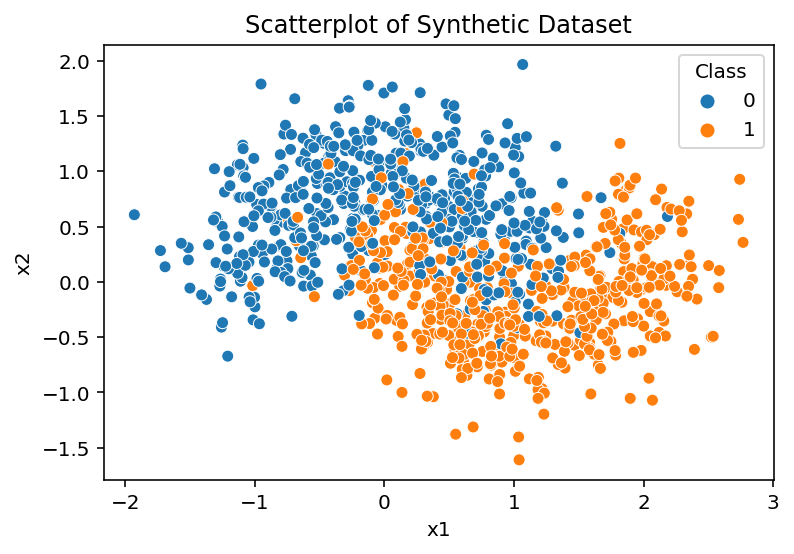

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.legend(title = "Class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot of Synthetic Dataset")
plt.show()



**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times (with replacement):


In [13]:
# Get the indices of three samples
sample_1_indices = np.random.choice(np.arange(0, 1000), 100, replace=True)
sample_2_indices = np.random.choice(np.arange(0, 1000), 100, replace=True)
sample_3_indices = np.random.choice(np.arange(0, 1000), 100, replace=True)

# Subset for the three samples
sample1_X = X[sample_1_indices, :]
sample2_X = X[sample_2_indices, :]
sample3_X = X[sample_3_indices, :]
sample1_y = y[sample_1_indices]
sample2_y = y[sample_2_indices]
sample3_y = y[sample_3_indices]

Fit the 9 models:

In [14]:
# Fit the KNN classifiers for first sample
sample1_k1 = KNeighborsClassifier(n_neighbors=1).fit(sample1_X, sample1_y)
sample1_k25 = KNeighborsClassifier(n_neighbors=25).fit(sample1_X, sample1_y)
sample1_k50 = KNeighborsClassifier(n_neighbors=50).fit(sample1_X, sample1_y)

# Fit the KNN classifiers for second sample
sample2_k1 = KNeighborsClassifier(n_neighbors=1).fit(sample2_X, sample2_y)
sample2_k25 = KNeighborsClassifier(n_neighbors=25).fit(sample2_X, sample2_y)
sample2_k50 = KNeighborsClassifier(n_neighbors=50).fit(sample2_X, sample2_y)

# Fit the KNN classifiers for third sample
sample3_k1 = KNeighborsClassifier(n_neighbors=1).fit(sample3_X, sample3_y)
sample3_k25 = KNeighborsClassifier(n_neighbors=25).fit(sample3_X, sample3_y)
sample3_k50 = KNeighborsClassifier(n_neighbors=50).fit(sample3_X, sample3_y)



**(d)** Plotting the decision boundaries:


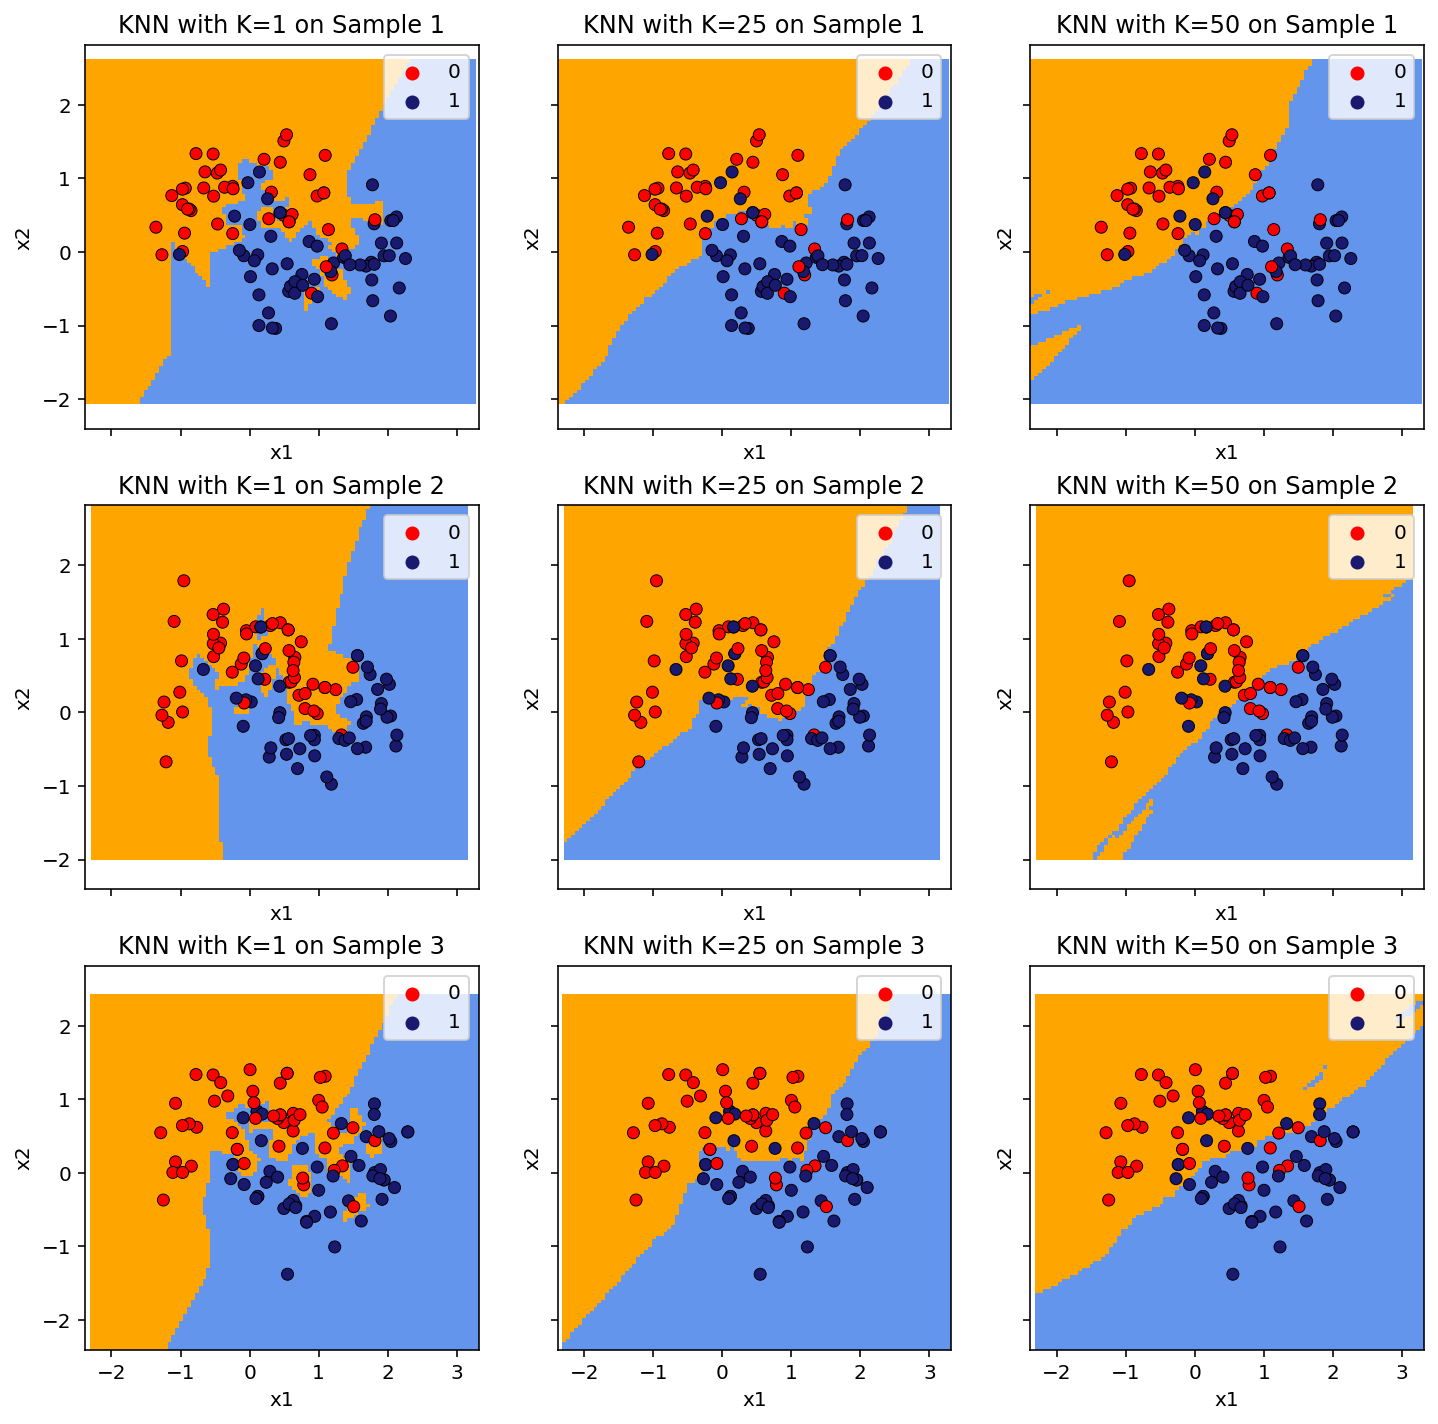

In [15]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["red", "midnightblue"]

# create a new function to graph each of the decision boundaries
def decision_boundary(model, x, y, cmap_light, cmap_bold, ax):
    # Graph the decision boundaries
    DecisionBoundaryDisplay.from_estimator(
        model,
        X=x,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="x1",
        ylabel="x2",
        shading="auto",
    )
    _ = sns.scatterplot(
        x=x[:, 0],
        y=x[:, 1],
        hue=y,
        ax=ax,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 12))
decision_boundary(
    model=sample1_k1,
    x=sample1_X,
    y=sample1_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[0][0],
)
axes[0, 0].set_title("KNN with K=1 on Sample 1")
decision_boundary(
    model=sample1_k25,
    x=sample1_X,
    y=sample1_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[0][1],
)
axes[0, 1].set_title("KNN with K=25 on Sample 1")
decision_boundary(
    model=sample1_k50,
    x=sample1_X,
    y=sample1_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[0][2],
)
axes[0, 2].set_title("KNN with K=50 on Sample 1")
decision_boundary(
    model=sample2_k1,
    x=sample2_X,
    y=sample2_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[1][0],
)
axes[1, 0].set_title("KNN with K=1 on Sample 2")
decision_boundary(
    model=sample2_k25,
    x=sample2_X,
    y=sample2_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[1][1],
)
axes[1, 1].set_title("KNN with K=25 on Sample 2")
decision_boundary(
    model=sample2_k50,
    x=sample2_X,
    y=sample2_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[1][2],
)
axes[1, 2].set_title("KNN with K=50 on Sample 2")
decision_boundary(
    model=sample3_k1,
    x=sample3_X,
    y=sample3_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[2][0],
)
axes[2, 0].set_title("KNN with K=1 on Sample 3")
decision_boundary(
    model=sample3_k25,
    x=sample3_X,
    y=sample3_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[2][1],
)
axes[2, 1].set_title("KNN with K=25 on Sample 3")
decision_boundary(
    model=sample3_k50,
    x=sample3_X,
    y=sample3_y,
    cmap_light=cmap_light,
    cmap_bold=cmap_bold,
    ax=axes[2][2],
)
axes[2, 2].set_title("KNN with K=50 on Sample 3")
plt.show()


**(e)** 
The most optimal decision boundary is the decision boundary given by the model with k = 25. To estimate the most optimal decision boundary, we apply the models trained on all three samples and all three k-values on unseen test data and evaluate which model yields the highest accuracy score. We can generate these data using the `make_moons` module on sklearn with the same parameters. We will use the random number generator to return 1 million test data. 

In [18]:
# Generate test data
X_test_5e, y_test_5e = make_moons(1000000, noise = 0.35)

In [21]:
# Get the sample accuracy on all 3 models trained on all 3 samples
accuracy_sample_1 = np.array(
    [
        sample1_k1.score(X_test_5e, y_test_5e),
        sample1_k25.score(X_test_5e, y_test_5e),
        sample1_k50.score(X_test_5e, y_test_5e),
    ]
)
accuracy_sample_2 = np.array(
    [
        sample2_k1.score(X_test_5e, y_test_5e),
        sample2_k25.score(X_test_5e, y_test_5e),
        sample2_k50.score(X_test_5e, y_test_5e),
    ]
)
accuracy_sample_3 = np.array(
    [
        sample3_k1.score(X_test_5e, y_test_5e),
        sample3_k25.score(X_test_5e, y_test_5e),
        sample3_k50.score(X_test_5e, y_test_5e),
    ]
)


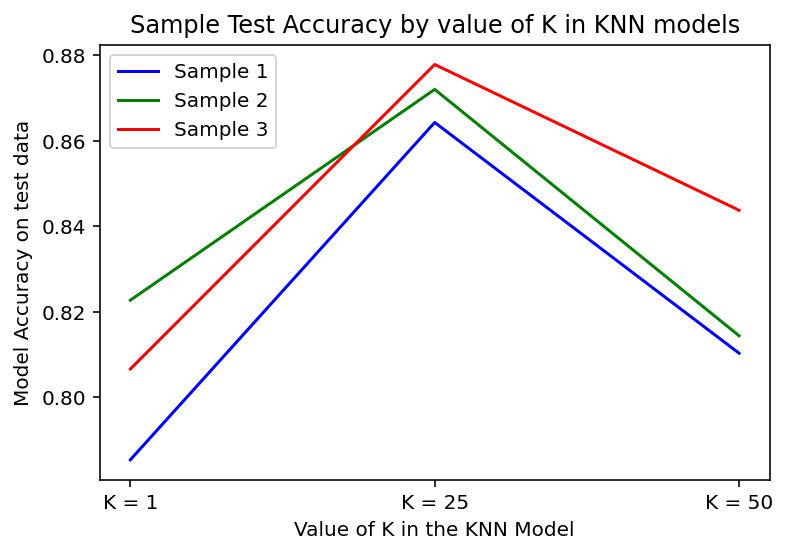

In [29]:
# Plot the accuracy scores
fig, ax = plt.subplots()
ax.plot(accuracy_sample_1, c = 'blue', label = "Sample 1")
ax.plot(accuracy_sample_2, c = 'green', label = "Sample 2")
ax.plot(accuracy_sample_3, c = 'red', label = "Sample 3")
plt.xticks([0, 1, 2], ['K = 1', 'K = 25', 'K = 50'])
plt.xlabel('Value of K in the KNN Model')
plt.ylabel('Model Accuracy on test data')
plt.title('Sample Test Accuracy by value of K in KNN models')
plt.legend()
plt.show()

As seen in the chart above, in all three sample, the model accuracy peaks when K = 25 and is lower when K = 1 or K = 50. This is because when K is 25, the model can reduce bias without increasing variance by too much. It can fit to the unseen test data better than the K = 1 model, which overfits to the training data, and the K = 50 model, which underfits to the training data.


**(f)** 
More flexible models, such as KNN models where the k value is smaller, have higher variance and lower bias. One can see that the model has higher variance because in each of the 3 samples, the decision boundaries are incredibly different. It also has low bias because it overfits to the training data, to a perfect degree, an the bias is effectively 0. If we make the model less flexible, by raising the k value to 25 or 50, for example, we see that the decision boundaries stay relatively similar across different samples. But we also sacrifice some of that low bias because the model no longer seeks to fit to every single datapoint. This is the bias-variance tradeoff. And the goal for data scientists while selecting models is to select the model that reduces the most bias in exchange for not as much variance.

---

## 6
**[18 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise explores the impact of the bias-variance tradeoff on classifier performance by looking at the performance on both training and test data.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function setting the `noise` parameter to 0.35), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of incorrect predictions).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In KNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)** Generate synthetic testing data

In [30]:
# Generate random samples
X_test, y_test = make_moons(noise=0.35, n_samples=1000)


**(b)** Plotting model accuracy on synthetic test data. 

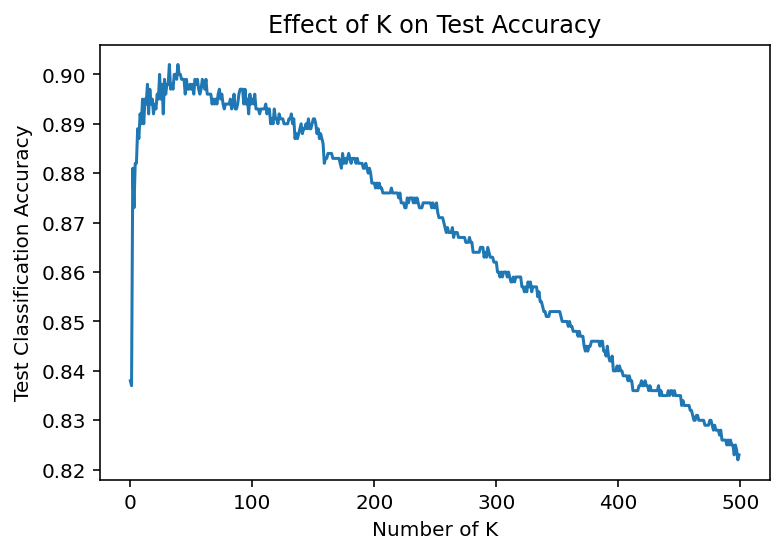

In [31]:
# Train knn classifiers
clf_error = []
for k in range(1, 501):
    clf = KNeighborsClassifier(n_neighbors=k).fit(X=X, y=y)
    clf_error.append(clf.score(X_test, y_test))

# Plot the list of erros
plt.plot(clf_error)
plt.xlabel("Number of K in KNN Model")
plt.ylabel("Test Classification Accuracy")
plt.title("Effect of K on Test Accuracy")
plt.show()


**(c)** 
As K increases initially, the test accuracy rate increase sharply but then reaches its peak at some value where k < 100. At which point the test accuracy starts decreasing as k increases.


**(d)**
K represents high bias at K = 500 because the model is consistently off. K represents high variance at K = 1 because it overfits to the data and changes dramatically from sample to sample. Generally, high k values represent high bias and low k values represent high variance.


**(e)** The optimal k value is given by the k with the highest test accuracy:


In [33]:
optimal_k = np.argmax(np.array(clf_error)) + 1
print(
    f"The most optimal value of k is {optimal_k} "
    "because it yields the highest test accuracy rates."
)


The most optimal value of k is 33 because it yields the highest test accuracy rates.



**(f)** Here are some factors that control the flexibility of other models:

- Linear models' flexibility is controlled by the number of $\beta$ parameters it has to estimate.
- Linear Discriminant Analysis models' flexibility is controlled by the shrinkage. 
- Support Vector Machines' flexibility is controlled by the regularization parameter, the degree of the kernel function, and the gamma kernel coefficients.
- Tree-based models' flexibilities are controlled by the number of trees, the maximum depth of each tree, the maximum features it considers looking for the best split, the maximum samples in each tree.

---

## 7
**[18 points] Linear regression and nonlinear transformations**. Linear regression can be used to model nonlinear relationships when feature variables are properly transformed to represent the nonlinearities in the data. In this exercise, you're given training and test data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted. Consider this your baseline model against which you will compare other model options. *Evaluating performance on the training data is not a measure of how well this model would generalize to unseen data. We will evaluate performance on the test data once we see our models fit the training data decently well.*  

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 z_1 + a_2 z_2 + \ldots + a_n z_n$. Here $z_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $z_1 = x$ and $z_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Visualize the model fit to the training data. Using both of the models you created in parts (b) and (c), plot the original data (as a scatter plot) AND the curves representing your models (each as a separate curve) from (b) and (c).

**(e)** Now its time to compare your models and evaluate the generalization performance on held out test data. Using the models above from (b) an (c), apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? How would the accuracy of generalization performance be impacted? Why?

*To help get you started - here's some code to help you load in the data for this exercise (you'll just need to update the path)*:

In [34]:
import pandas as pd

path = "https://github.com/kylebradbury/ids705/raw/main/assignments/data/"
train = pd.read_csv(path + "A2_Q7_train.csv")
test = pd.read_csv(path + "A2_Q7_test.csv")

x_train = train.x.values
y_train = train.y.values

x_test = test.x.values
y_test = test.y.values


**ANSWER**

**(a)** Create a scatter plot of training data:

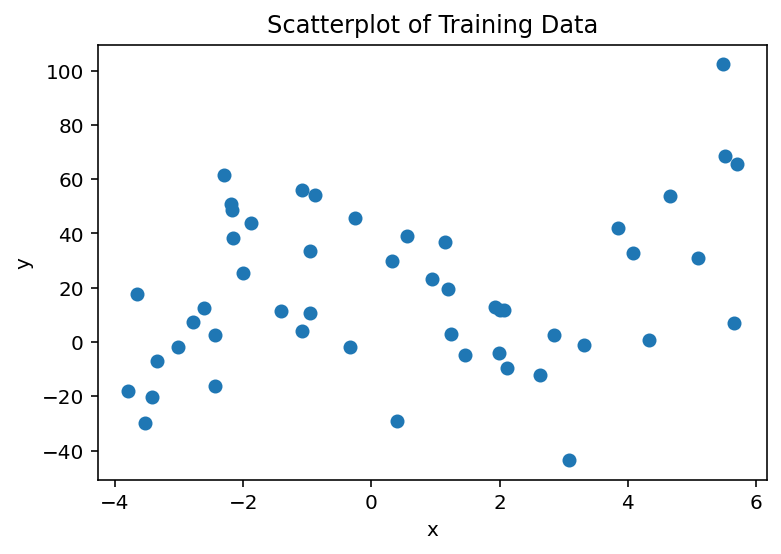

In [35]:
plt.scatter(x=x_train, y=y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatterplot of Training Data")
plt.show()


**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$), report $R^2$ value, mean square error, and model equation:

In [36]:
# Import Linear Regression module, MSE module
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantialize the linear model
linear_model_b = LinearRegression()

# Reshape the training data to conform to regression model
x_train = x_train.reshape([-1, 1])
x_test = x_test.reshape([-1, 1])

# Fit the model to training data
linear_model_b.fit(X=x_train, y=y_train)

# Print out the R squared value
print(
    "The linear regression model has R squared value of"
    f" {linear_model_b.score(X = x_train, y = y_train):.2f}."
    ""
)

# Print MSE
print(
    "The model has an mean squared error of "
    f"{mean_squared_error(y_train, linear_model_b.predict(x_train)):.2f}."
)

# Print out model formula
intercept_b = linear_model_b.intercept_
coefb = linear_model_b.coef_[0]
print(
    "The equation of the linear regression is given by: "
    f"y = {intercept_b:.2f} + {coefb:.2f}x."
)


The linear regression model has R squared value of 0.06.
The model has an mean squared error of 791.42.
The equation of the linear regression is given by: y = 17.20 + 2.59x.



**(c)** Estimate a nonlinear regression model, report $R^2$ value, mean square error, and model equation.

After trying out a few different polynomial fits, we found that a model with 3 engineered features, where $x_1 = sin(x)$, $x_2 = x^{2}$, and $x_3 = x^{3}$ that minimizes training error.

In [37]:
# Transform the x features into 3 new features
# First feature: sin(x), Second feature: x^2, Third feature: x^3

x_train_transformed = np.concatenate(
    [np.sin(x_train), np.power(x_train, 2), np.power(x_train, 3)], axis=1
)

# Fit the new linear model
linear_model_c = LinearRegression()
linear_model_c.fit(X=x_train_transformed, y=y_train)

# Print out the R squared value
print(
    "The linear regression model has R squared value of"
    f" {linear_model_c.score(X = x_train_transformed, y = y_train):.2f}."
    ""
)

# Print MSE
mse_c = linear_model_c.predict(x_train_transformed)
print(
    "The model has an mean squared error of "
    f"{mean_squared_error(y_train, mse_c):.2f}."
)

# Print out model formula
intercept_c = linear_model_c.intercept_
coefc1, coefc2, coefc3 = linear_model_c.coef_
print(
    "The equation of the linear regression is given by: "
    f"y = {intercept_c:.2f} + {coefc1:.2f}sin(x)"
    f" + {coefc2:.2f}x^2 + {coefc3:.2f}x^3."
)


The linear regression model has R squared value of 0.35.
The model has an mean squared error of 548.07.
The equation of the linear regression is given by: y = 19.93 + -15.02sin(x) + -1.10x^2 + 0.31x^3.



**(d)** Plotting the training data with regression line overlays:

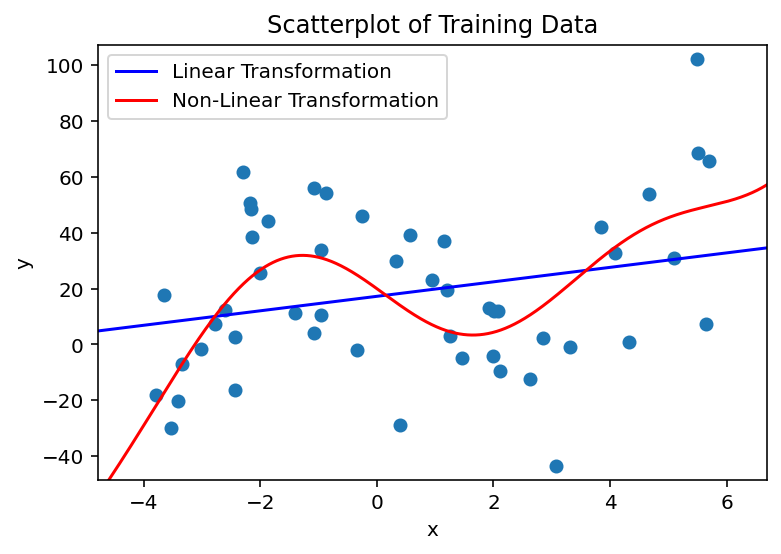

In [38]:
# Draw the regression lines
line = np.arange(-10, 10, 0.005)
regression_line_b = intercept_b + line * coefb
regression_line_c = (
    intercept_c
    + np.sin(line) * coefc1
    + np.power(line, 2) * coefc2
    + np.power(line, 3) * coefc3
)

# Plot them
plt.scatter(x_train, y_train)
plt.plot(line, regression_line_b, color="blue", 
        label="Linear Transformation")
plt.plot(line, regression_line_c, color="red", 
        label="Non-Linear Transformation")
plt.xlim([x_train.min() - 1, x_train.max() + 1])
plt.ylim([y_train.min() - 5, y_train.max() + 5])
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Scatterplot of" 
    "Training Data")
plt.show()



**(e)** Apply the two models to the test data and estimate the $R^2$ and mean square error of the test dataset:


In [39]:
from sklearn.metrics import r2_score

# Get R_squared of test data
r_sq_b = r2_score(y_test, linear_model_b.predict(x_test))

x_test_transformed = np.concatenate(
    [np.sin(x_test), np.power(x_test, 2), np.power(x_test, 3)], axis=1
)
r_sq_c = r2_score(y_test, linear_model_c.predict(x_test_transformed))

# Get MSE of test data
mse_test_b = mean_squared_error(y_test, linear_model_b.predict(x_test))
mse_test_c = mean_squared_error(y_test, linear_model_c.predict(x_test_transformed))

# Print out the model metrics
print(
    "The model in part (b) has an R^2 value of "
    f"{r_sq_b:.2f} and a mean squared error of "
    f"{mse_test_b:.2f}."
)
print(
    "The model in part (c) has an R^2 value of "
    f"{r_sq_c:.2f} and a mean squared error of "
    f"{mse_test_c:.2f}."
)


The model in part (b) has an R^2 value of -0.13 and a mean squared error of 1116.66.
The model in part (c) has an R^2 value of -0.11 and a mean squared error of 1092.83.



**(f)** 
The model in part (c) performs better on the training data but only slightly better on the test data. Both model performed worse than the null model, hence their negative $R^{2}$ score. This is because while the model in part (c) had a decent $R^{2}$ score using training data, the model overfitted to the training data. And using out-of-sample data, it dramatically underperformed. As for the model from part (b), we already knew that it performed poorly on the training data, so it was not a surprise to find a low $R^{2}$ and MSE score using test data.


**(g)** 
If the test data was significantly different from the training dataset, the model would not be able to predict samples in the test data very accurately. Both an inflexible or a flexible statistical learning method would likely to underperform in a test dataset where the data they see are significantly different from the data they were trained on. The model would not be able to generalize well to new data and would therefore have a highly inaccurate generalization performance.